In [1]:
# Authors: Samantha Tetef and Vikram Kashyap
# Date: Winter 2020-2021 to Summer 2021

In [2]:
import utils
from utils import *

from importlib import reload
# to reload utils, run:
utils = reload(utils)
from utils import *

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from matplotlib.colors import to_hex
from matplotlib.colors import ListedColormap
from matplotlib import gridspec
import mplcursors

from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.cluster import hierarchy

from itertools import compress
from pathlib import Path
import webbrowser

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
   return false;
}

<IPython.core.display.Javascript object>

In [4]:
# bins = [0, 0, 1]
# hist(bins, ['PCA', 'VAE', 't-SNE'], verbose=True, colormap=plt.cm.tab20)


# bins = [1, 1]
# hist(bins, ['VtC-XES', 'XANES'], verbose=True, colormap=plt.cm.tab20)

# bins = [5, 9, 20, 30, 25]
# hist(bins, np.arange(2017,2022), verbose=True, xlabel='Year', colormap=plt.cm.tab20_r)

In [5]:
ROOTDIR = Path()

CIDdir = ROOTDIR/"ProcessedData"
Listdir = ROOTDIR/"Categories"

X_data = get_Data(Listdir)

In [6]:
X_data_classed = [c for c in X_data if c['Class']!='None']
compoundmap = {compound['CID']:compound for compound in X_data_classed}

CIDs = np.array([c['CID'] for c in X_data_classed])
NoneCIDs = np.array([c['CID'] for c in X_data if c['Class']=='None'])

# CLASSSIFICATION MAPS
# classes
classcodemap = {compound['CID']:CLASSCODES[compound['Class']] for compound in X_data_classed
                if compound['Class'] in CLASSCODES.keys()}
# coordination
coordcodemap = {compound['CID']:COORDCODES[compound['Class']] for compound in X_data_classed
                if compound['Class'] in COORDCODES.keys()}
# phosphorane subclasses
phosphoranecodemap = {compound['CID']:PHOSPHORANECODES[compound['Class']] for compound in X_data_classed
                      if compound['Class'] in PHOSPHORANECODES.keys()}
# phosphorane subclasses
sulfurcodemap = {compound['CID']:SULFURCODES[compound['Class']] for compound in X_data_classed
                 if compound['Class'] in SULFURCODES.keys()}
# chargemap
chargemap = {compound['CID']:compound['Charge'] for compound in X_data_classed}

classnames = list(CLASSCODES.keys())[:-1]

XANES_energies = X_data[0]['XANES_Spectra'][0]
XES_energies = X_data[0]['XES_Spectra'][0]

In [7]:
len(X_data_classed)

852

# Visualization of Classification Distributions

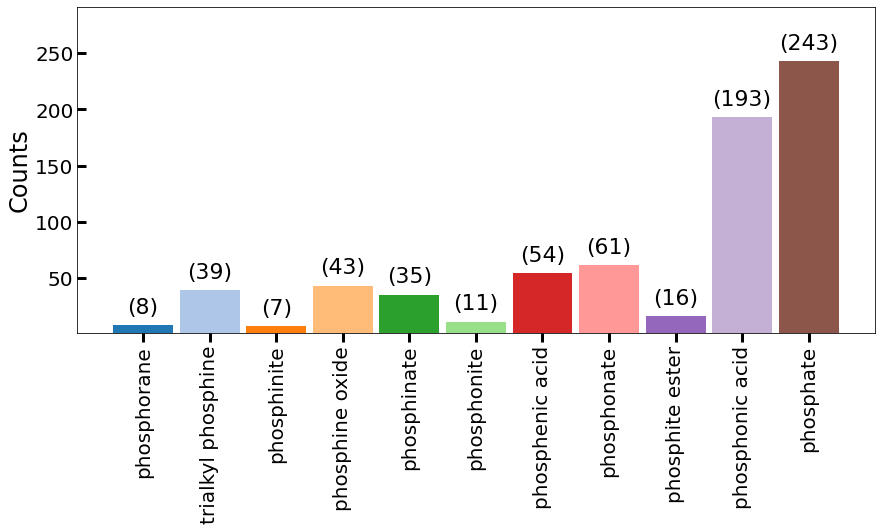

In [8]:
# bins = [1 for classname in classnames]
# hist(bins, [c.replace('_', ' ') for c in classnames], verbose=False)

coord_classnames = list(COORDCODES.keys())
# bins = [1 for classname in coord_classnames]
bins = [len([c for c in X_data if c['Class']==classname]) for classname in coord_classnames]
hist(bins, [c.replace('_', ' ') for c in coord_classnames], verbose=True)

# bins = [1 for coord in [3,4]]
# hist(bins, np.array([3,4]), verbose=False, xlabel='Coordination')

# Theory and Experiment Comparison

In [9]:
# checkcids = [11776, 13097, 8289]

# for cid in checkcids:    
#     c = compoundmap[cid]
#     trans = c['XANES_Transitions']
#     trans = esnip(trans, c['XANES_Normalized'], energy=XANES_energies, mode='xanes')
#     plot_spectrum_and_trans([XANES_energies, c['XANES_Normalized']], trans, f'{cid}', label='XANES')

In [10]:
# df1 = pd.read_csv('ExperimentalData/Ph3P.csv')
# df2 = pd.read_csv('ExperimentalData/Ph3PO.csv')
# df3 = pd.read_csv('ExperimentalData/PhO3PO.csv')

# hc = 1.23984193e-6 #ev/m
# d = 6.5327e-10 #m
# def to_energy(two_theta):
#     return hc/(d*np.sin(two_theta*(np.pi/180)/2))


# def stack_plot(Spectrums, Labels, title=None,
#                verbose=True, label=None, peaknorm=True):
    
#     n = len(Spectrums)
#     Colors=plt.cm.viridis(np.arange(n)/(n+1))
#     if n == 2:
#         Colors=['black', 'red']
#     fig, ax = plt.subplots(figsize=(10,8))

#     i = 0
#     for spectrum in Spectrums:
#         x, y = spectrum
#         if peaknorm:
#             y = y/np.max(y)
#         ax.plot(x, y, '-', color=Colors[i], linewidth=2, label=Labels[i])
#         i += 1

#     if title is not None:
#         plt.title(title, fontsize=20)
#     plt.xlabel('Energy (eV)', fontsize=18)
#     plt.tick_params(labelsize=16)

#     if verbose:
#         ax.xaxis.set_major_locator(MultipleLocator(5))
#         ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
#         ax.xaxis.set_minor_locator(MultipleLocator(1))
#         ax.tick_params(direction='in', width=1, length=5, which='minor')

#     ax.tick_params(direction='in', width=2, length=8, which='major')

#     plt.legend(fontsize=20)
    
#     plt.show()

    
# ####################### spectrum 1
# cid = checkcids[0]
# x = to_energy(df1['2theta'].values)
# y = df1['I'].values
# y = y - np.min(y)
# y = y/np.max(y)
# emin, emax = 350, 800
# x2 = XES_energies[emin:emax]
# c = compoundmap[cid]
# y2 = c['XES_Normalized'][emin:emax]
# e_shift = x2[np.argmax(y2)] - x[np.argmax(y)]
# stack_plot([[x, y],[x2-e_shift, y2]], ['Yasuda, 1984', 'NWChem'], title="$Ph_3P$")

# ####################### spectrum 2
# cid = checkcids[2]
# x = to_energy(df3['2theta'].values)
# y = df3['I'].values
# y = y - np.min(y)
# y = y/np.max(y)
# emin, emax = 410, 750
# x2 = XES_energies[emin:emax]
# c = compoundmap[cid]
# y2 = c['XES_Normalized'][emin:emax]
# stack_plot([[x, y],[x2-e_shift, y2]], ['Yasuda, 1984', 'NWChem'], title="$PhO_3PO$", verbose=True)

# ML and Data Science section

## Rainbow Spaghetti Plot: Color and Stack by Class

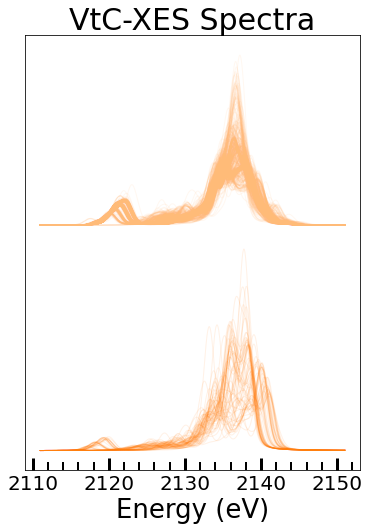

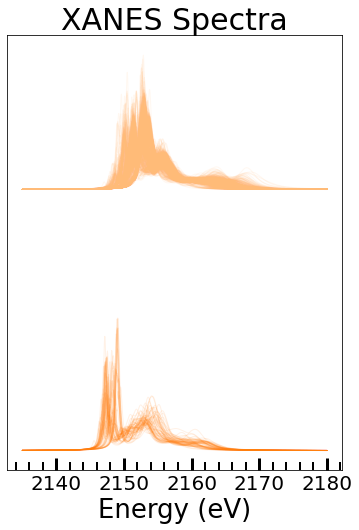

In [11]:
codemap = coordcodemap

hiddenCIDS = np.array([c['CID'] for c in X_data if not c['CID'] in codemap.keys()])

xesspagplt = plot_spaghetti(plt.subplots(figsize=(6,8)), compoundmap, colorcodemap=codemap, binmap=codemap,
               mode='XES', coloralpha=0.1, hiddencids=hiddenCIDS, colormap=plt.cm.tab10, hiddenalpha=0, scale=False)
xanesspagplt = plot_spaghetti(plt.subplots(figsize=(6,8)), compoundmap, colorcodemap=codemap, binmap=codemap,
               mode='XANES', coloralpha=0.1, hiddencids=hiddenCIDS, colormap=plt.cm.tab10, hiddenalpha=0, scale=False)

# Dimensionality Reduction

# PCA + t-SNE

In [12]:
XES = np.array([c['XES_Normalized'] for c in X_data_classed])
XANES = np.array([c['XANES_Normalized'] for c in X_data_classed])

# pca
pca_all_xes = PCA()
XES_PCA = pca_all_xes.fit_transform(XES)
pca_all_xanes = PCA()
XANES_PCA = pca_all_xanes.fit_transform(XANES)

N = XANES_PCA.shape[1]

explained_var_xes = np.array([np.sum(pca_all_xes.explained_variance_ratio_[:i+1]) for i in range(N)])
explained_var_xanes = np.array([np.sum(pca_all_xanes.explained_variance_ratio_[:i+1]) for i in range(N)])

threshold_xes = np.where(explained_var_xes >= 0.9)[0][0]
threshold_xanes = np.where(explained_var_xanes >= 0.9)[0][0]

print(f"VtC-XES takes {threshold_xes+1} PCs to explain {explained_var_xes[threshold_xes]:.04f} variance")
print(f"XANES takes {threshold_xanes+1} PCs to explain {explained_var_xanes[threshold_xanes]:.04f} variance")

VtC-XES takes 6 PCs to explain 0.9113 variance
XANES takes 12 PCs to explain 0.9116 variance


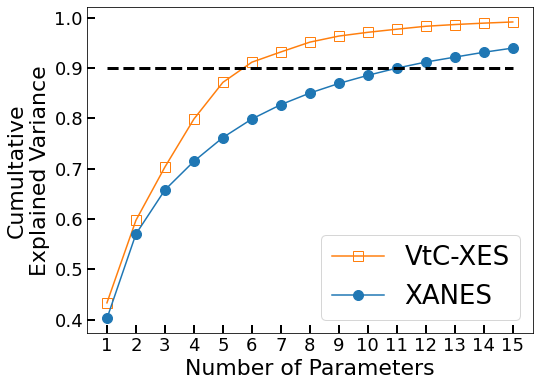

In [13]:
def make_stacked_scree(xes, xanes, n=None):
    
    if n is None:
        n = len(xanes)
    else:
        xes = xes[:n]
        xanes = xanes[:n]

    fig, ax = plt.subplots(figsize=(8,6))

    x = np.arange(n)+1
    
    cdf_xes = [np.sum(xes[:i+1]) for i in range(n)]
    cdf_xanes = [np.sum(xanes[:i+1]) for i in range(n)]

    ax.plot(x, cdf_xes, 's-', markersize=10, fillstyle='none', color=plt.cm.tab10(.15), label='VtC-XES')
    ax.plot(x, cdf_xanes, 'o-', markersize=10, color=plt.cm.tab10(0.05), label='XANES')
    ax.plot(x, np.ones(len(x))*0.9, 'k--', linewidth=3)

    plt.xticks(x, fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Number of Parameters', fontsize=22)
    plt.ylabel(f'Cumultative\nExplained Variance', fontsize=22)
    ax.tick_params(direction='in', width=2, length=8)
    
    plt.legend(fontsize=26)

    plt.savefig('../Figures/scree', dpi=800, transparent=True, bbox_inches='tight')
    plt.show()
    
make_stacked_scree(pca_all_xes.explained_variance_ratio_, pca_all_xanes.explained_variance_ratio_, n=15)

# Coordination

In [14]:
X_coord, XES_tsnemap, XES_TSNE, hiddenCIDS = get_subset_maps(X_data, coordcodemap, mode='XES')
X_coord, XANES_tsnemap, XANES_TSNE, hiddenCIDS = get_subset_maps(X_data, coordcodemap, mode='XANES')

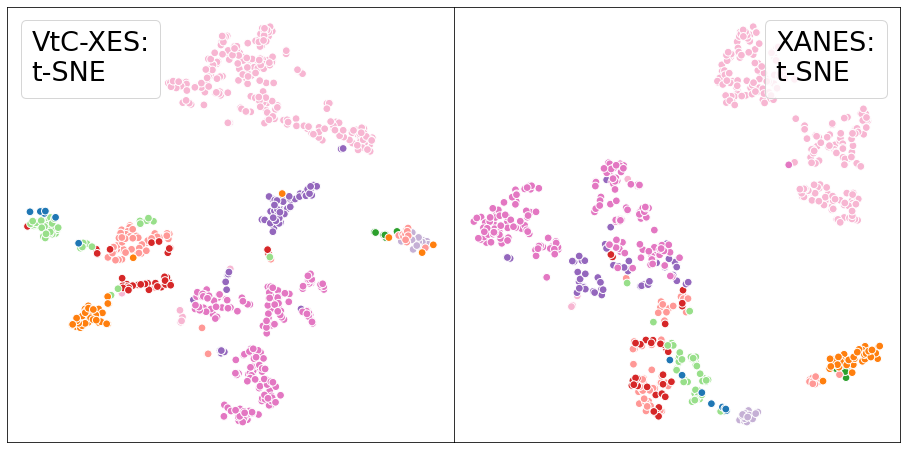

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
plt.subplots_adjust(wspace=0)
for mode in ['XES', 'XANES']:
    if mode == 'XES':
        tsnemap = XES_tsnemap
        col = 0
    else:
        tsnemap = XANES_tsnemap
        col = 1
    class_tsneplt = plot_dim_red((fig, axes[col]), X_coord, tsnemap, colorcodemap=classcodemap,
                                 mode=mode, method='t-SNE', hiddencids=hiddenCIDS, fontsize=27,
                                 size=60, edgecolors='w')

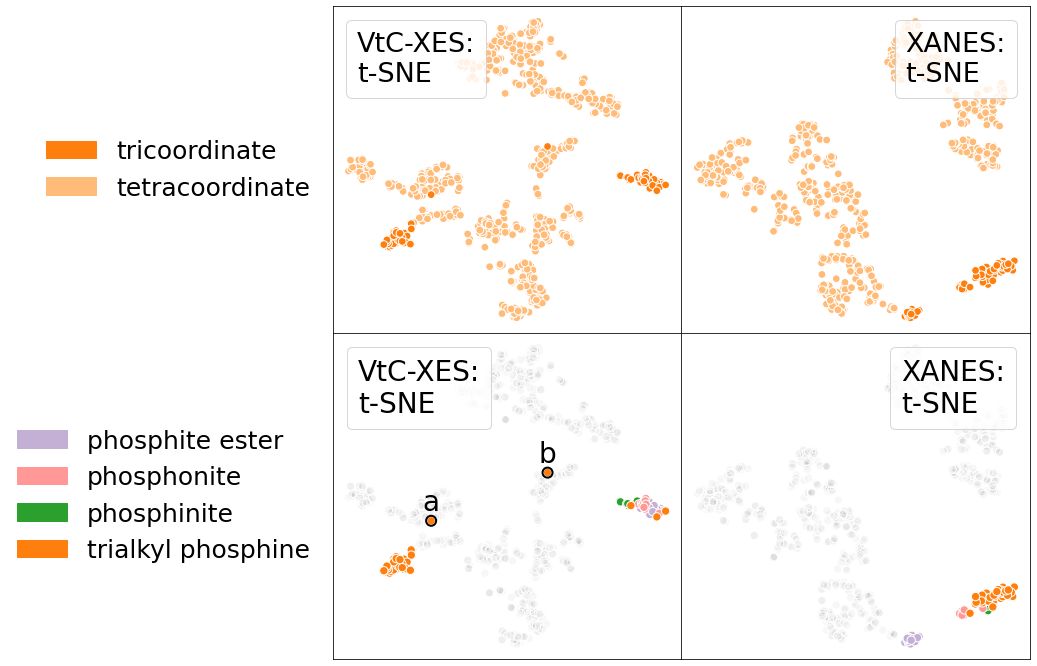

In [16]:
tricoord_classes = [k for k,v in COORDCODES.items() if v == 3]
kwargs = {'Class': tricoord_classes}

fig = plt.figure(figsize=(15,12))
spec = fig.add_gridspec(nrows=2, ncols=3, width_ratios=[0.4, 1, 1])
plt.subplots_adjust(wspace=0, hspace=0)

for mode in ['XES', 'XANES']:
    if mode == 'XES':
        tsnemap = XES_tsnemap
        col = 1
    else:
        tsnemap = XANES_tsnemap
        col = 2
        
    ax = fig.add_subplot(spec[0, col])
    tsneplt = plot_dim_red((fig, ax), X_coord, tsnemap,
                           colorcodemap=coordcodemap, size=60, edgecolors='w',
                           mode=mode, method='t-SNE', hiddencids=hiddenCIDS, fontsize=27)
    
    if mode == 'XES':
        label=['a', 'b']
        kwargs = {'Class': tricoord_classes, 'CID': [129643930, 10304870]}
    else:
        kwargs = {'Class': tricoord_classes}
        label = None
        
    ax = fig.add_subplot(spec[1, col])
    tricoord_tsneplt = plot_dim_red((fig, ax), X_coord, tsnemap, size=70,
                                     colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.03,
                                     label=label, mode=mode, method='t-SNE', fontsize=28, edgecolors='w',
                                     **kwargs)
    if mode == 'XES':
        legend_labels = ['tricoordinate', 'tetracoordinate']
        ax = fig.add_subplot(spec[0, 0])
        make_legend((fig, ax), legend_labels, None, codes={'tricoordinate':3, 'tetracoordinate':4},
                         include_structures=False)
    else:
        legend_labels = ['phosphite_ester', 'phosphonite', 'phosphinite', 'trialkyl_phosphine']
        ax = fig.add_subplot(spec[1, 0])
        make_legend((fig,ax), legend_labels, None, include_structures=False)

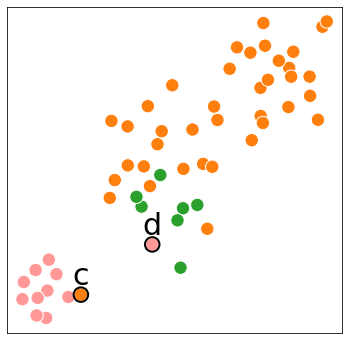

In [17]:
tricoord_classes = [k for k,v in COORDCODES.items() if v == 3]
tricoord_classes.remove('phosphite_ester')
figsize=(6,6)
kwargs = {'Class': tricoord_classes, 'CID': [136869, 118143996]}
label = ['c','d']
        
tricoord_tsneplt = plot_dim_red(plt.subplots(figsize=figsize), X_coord, XANES_tsnemap, size=180,
                                colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.0,
                                mode='XANES', method='t-SNE', fontsize=30, edgecolors='w',
                                label=label, show_legend=False, **kwargs) 

# Charge

C:\Users\saman\Downloads\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


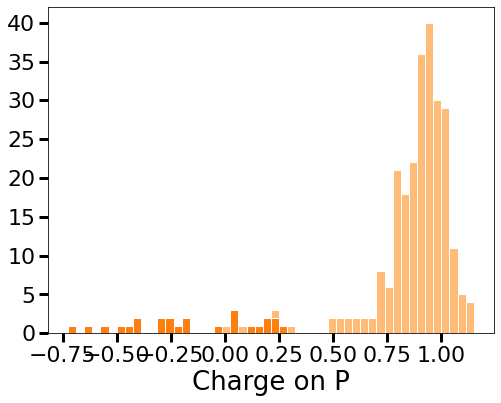

In [18]:
chargemap_coord = {compound['CID']:compound['Charge'] for compound in X_coord}
make_charge_hist(chargemap_coord, colorcodemap=coordcodemap)    

In [19]:
# hiddencids = [compound['CID'] for compound in X_coord if compound['Charge'] == -1]

# charge_kwargs = {'Charge': [-0.9,2.]}
# scaled_chargemap, min_charge, max_charge = get_scaled_chargemap(X_coord, hiddencids=hiddencids, **charge_kwargs)

# for mode in ['XES', 'XANES']:
#     if mode == 'XES':
#         tsnemap = XES_tsnemap
#     else:
#         tsnemap = XANES_tsnemap
#     tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, tsnemap, mode=mode,
#                             hiddenalpha=0.1, method='t-SNE', fontsize=20,
#                             colormap=plt.cm.viridis, hiddencids=hiddencids, size=30,
#                             colorcodemap=scaled_chargemap, scalecolor=False, colorbar=True,
#                             cbarlim=(min_charge, max_charge), label=f'Charge on P\ncharge > {min_charge:.2f}',
#                             heatmap=True)

## Phosphate subclusters

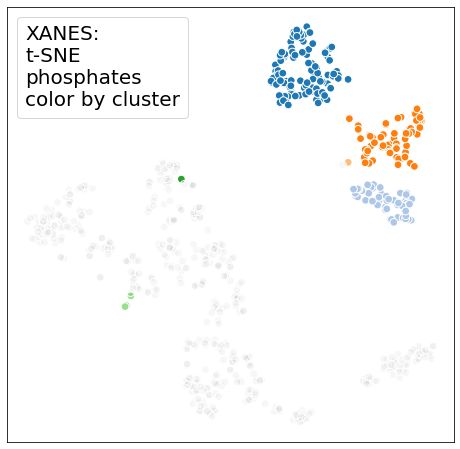

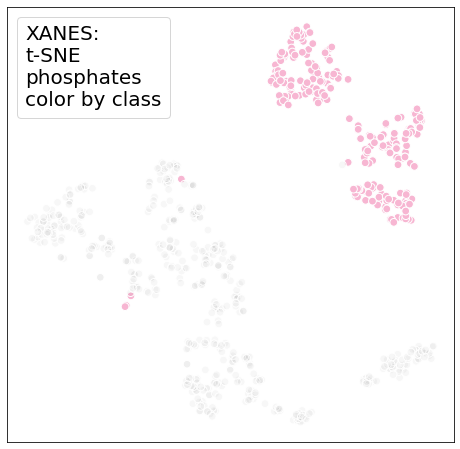

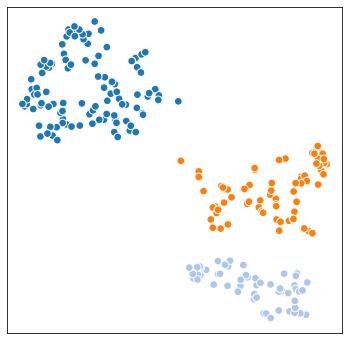

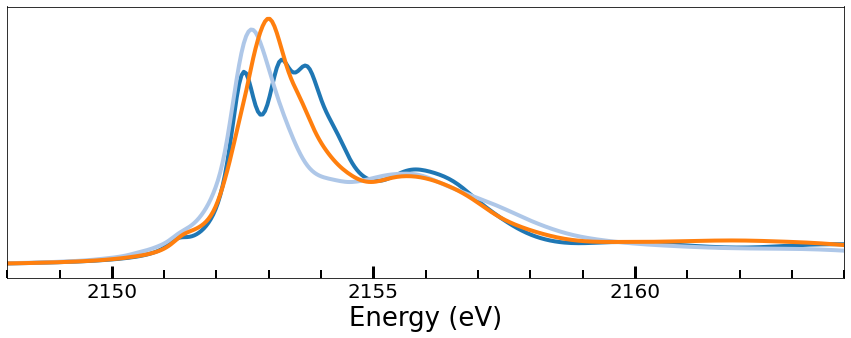

In [20]:
options = {'loc':2, 'title': None}
kwargs = {'Class': ['phosphate']}

############ create DBScan clusters
tsne_phosphates = np.array([XANES_tsnemap[c['CID']] for c in X_data_classed if c['Class'] == 'phosphate'])
cids_phosphates = [c['CID'] for c in X_data_classed if c['Class'] == 'phosphate']

dbscan_clustering = DBSCAN(eps=3.3, min_samples=1).fit(tsne_phosphates)
dbscan_clustermap = {cid:cluster for cid,cluster in zip(cids_phosphates, dbscan_clustering.labels_)}

############ plot all phosphates with clusters indicated by DBSCAN
phosphate_clustermap = {}
for c in X_data_classed:
    if c['Class'] == 'phosphate':
        phosphate_clustermap[c['CID']] = dbscan_clustermap[c['CID']] + 1
    else:
        phosphate_clustermap[c['CID']] = 0
              
select_clusters = [1,2,3]
X_phosphate = [c for c in X_data_classed if phosphate_clustermap[c['CID']] in select_clusters]

colorcodemap = {c['CID']:phosphate_clustermap[c['CID']] for c in X_data_classed \
          if phosphate_clustermap[c['CID']] in select_clusters}
binmap = {k:v*0.5 for k,v in colorcodemap.items()}

############ tsne plot all phosphates with clusters indicated by DBSCAN
tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, XANES_tsnemap, size=60,
                        colorcodemap=phosphate_clustermap, coloralpha=1., hiddenalpha=0.03,
                        mode='XANES', method='t-SNE\nphosphates\ncolor by cluster', fontsize=20, edgecolors='w',
                        **Merge(kwargs, options))

############ tsne plot all phosphates all one color
tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, XANES_tsnemap, size=60,
                        colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.03, fontsize=20,
                        mode='XANES', method='t-SNE\nphosphates\ncolor by class', edgecolors='w',
                        **Merge(kwargs, options))

############ zoomed in on clusters
tsne_plt = plot_dim_red(plt.subplots(figsize=(6,6)), X_phosphate, XANES_tsnemap, size=60,
                        colorcodemap=phosphate_clustermap, coloralpha=1., hiddenalpha=0.03,
                        mode='XANES', method='t-SNE', fontsize=20, edgecolors='w', show_legend=False,
                        **Merge(kwargs, options))

############ spaghetti plot of average clusters indicated by DBSCAN
spaghetti_plt = plot_spaghetti(plt.subplots(figsize=(15,5)), compoundmap, mode='XANES',
                               colorcodemap=colorcodemap, binmap=binmap, linewidth=4, energyrange=(2148,2164),
                               hiddenalpha=0, coloralpha=1.0, average_bins=True, **Merge(kwargs, options))

In [21]:
# cids = [151020, 3034794]
# III: 11242708 
# II: 
# I: 
# labels = ['Ia', 'Ib']
# for i, cid in enumerate(cids):
#     plot_spectrum_and_trans((fig, axes[i]), compoundmap, cid, verbose=True,
#                                 mode='XANES', energyrange=(2148,2169), color=0,
#                                 link_pubchem=True, label=labels[i])

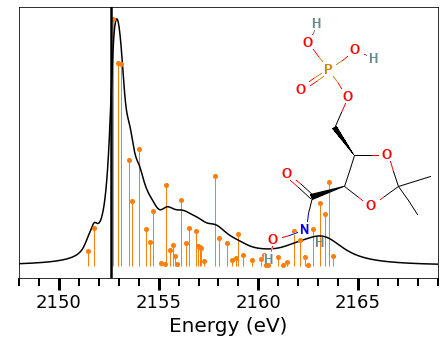

In [23]:
cid = 11242708
# cid = 107737
# cid = 122250
plot_spectrum_and_trans(plt.subplots(figsize=(7.5,5)), compoundmap, cid, verbose=True,
                                     mode='XANES', energyrange=(2148,2169), color=dbscan_clustermap[cid],
                                     link_pubchem=True)

In [24]:
# for select in [0,1,2]:
#     cids = []
#     for cid, cluster in dbscan_clustermap.items():
#         if cluster == select and compoundmap[cid]['Charge'] != -1:
#             cids += [cid]

#     N = 6
#     cids = np.array(cids[:N*2]).reshape((2,N))
#     print(cids)
    
#     fig, axes = plt.subplots(nrows=N, ncols=2, figsize=(15,N*5))
#     plt.subplots_adjust(wspace=0, hspace=0)

#     for cluster, cid_list in enumerate(cids):
#         for i, cid in enumerate(cid_list):
#             if i == N-1:
#                 verbose = True
#             else:
#                 verbose = False
#             plot_spectrum_and_trans((fig, axes[i, cluster]), compoundmap, cid, verbose=verbose,
#                                     mode='XANES', energyrange=(2148,2169), color=select,
#                                     link_pubchem=True)

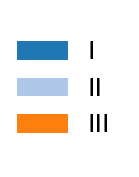

In [25]:
labels= ['I', 'II', 'III']
pattern = None
plot = plt.subplots(figsize=(2,3))
fig = make_legend(plot, labels, pattern, codes={'I':1, 'II':2, 'III':3}, include_structures=False)

In [26]:
# 186 vs 466 (both have OH H-bonded intramolecularly but 466 has additional H bond with OR group)
# same with 186 vs 11988266
# vs 107737 (2 OH with only OR H-bonded)
# 10541 vs 13134 (3 H bonds for all 3 Os vs just 2 Os)
# same with 6535 vs 654
# 120825 vs 13869 (1 H bond each vs 2 H-bonds each)
# 11207678 vs 104993 (2 OR H bonding vs 1)

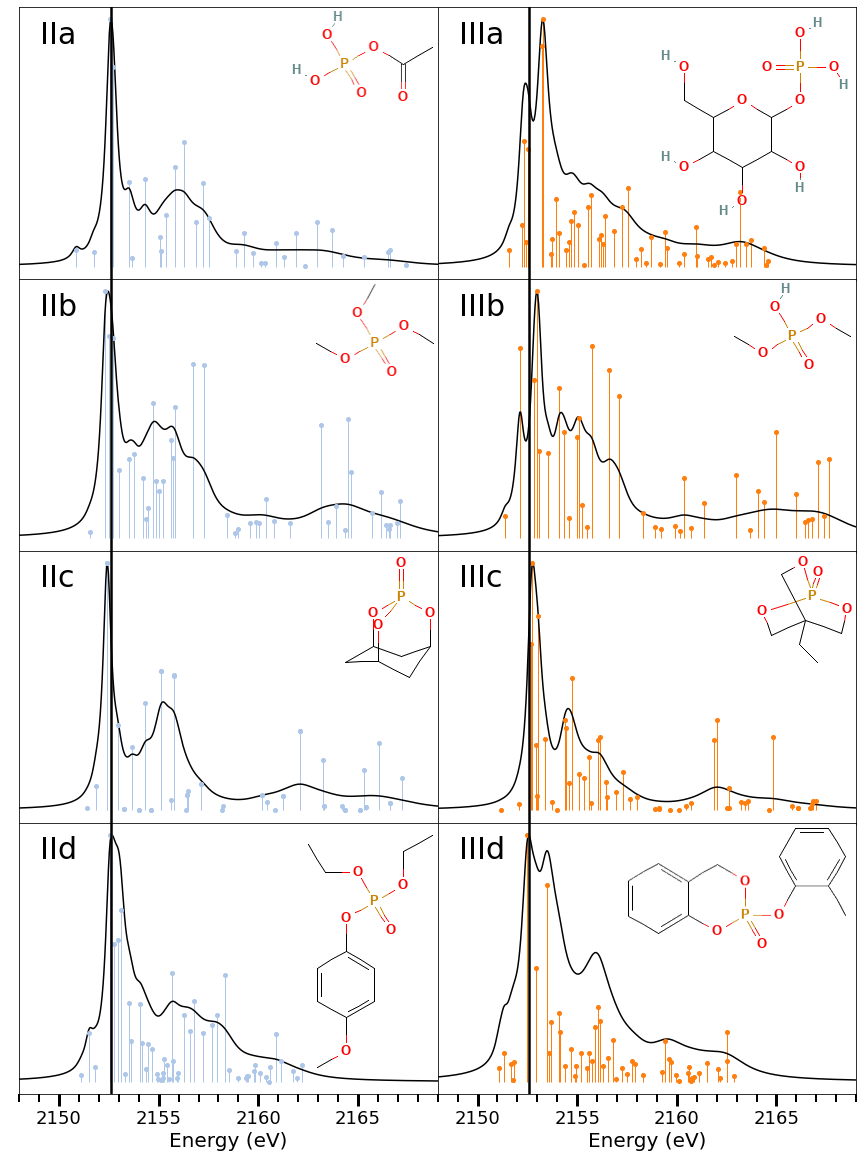

In [27]:
cluster_cids = np.array([[186, 10541, 120825, 11207678],[466, 13134, 13869, 104993]])
N = cluster_cids.shape[1]

fig, axes = plt.subplots(nrows=N, ncols=2, figsize=(15,N*5))
plt.subplots_adjust(wspace=0, hspace=0)
# labels = [['a', 'c', 'e', 'g'], ['b', 'd', 'f', 'h']]
labels = [['IIa', 'IIb', 'IIc', 'IId'], ['IIIa', 'IIIb', 'IIIc', 'IIId']]

for cluster, cid_list in enumerate(cluster_cids):
    for i, cid in enumerate(cid_list):
        if i == N-1:
            verbose = True
        else:
            verbose = False
        plot_spectrum_and_trans((fig, axes[i, cluster]), compoundmap, cid, verbose=verbose,
                                mode='XANES', energyrange=(2148,2169), color=cluster+1,
                                link_pubchem=True, label=labels[cluster][i])

# Other subset analysis

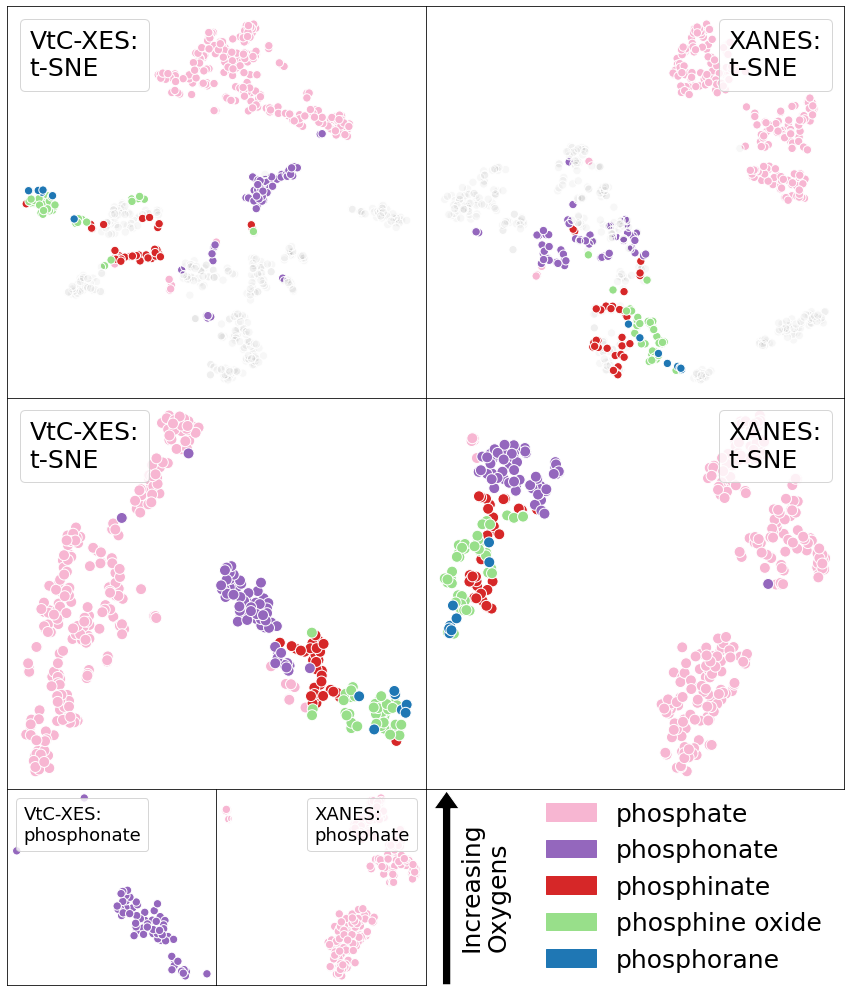

In [28]:
# select = ['phosphite_ester', 'phosphonite', 'phosphinite', 'trialkyl_phosphine']
select = ['phosphate', 'phosphonate', 'phosphinate', 'phosphine_oxide', 'phosphorane']
# select = ['phosphinate', 'phosphenic_acid']

fig = plt.figure(figsize=(15,18))
spec = fig.add_gridspec(nrows=3, ncols=4, height_ratios=[1, 1, 0.5])
plt.subplots_adjust(wspace=0, hspace=0)

for mode in ['XES', 'XANES']:
    kwargs = {'Class': select}
    colormap = plt.cm.tab20
    if mode == 'XES':
        tsnemap = XES_tsnemap
        perp = 16
#         sub_kwargs = {'Class': ['phosphine_oxide']}
        sub_kwargs = {'Class': ['phosphonate']}
        col = 0
    else:
        tsnemap = XANES_tsnemap
        perp = 12
        sub_kwargs = {'Class': ['phosphate']}
        col = 2
        
    #################### tsne plot ensemble
    ax = fig.add_subplot(spec[0, col:col+2])
    tsne_plt = plot_dim_red((fig, ax), X_coord, tsnemap, size=70,
                            colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.03,
                            mode=mode, method='t-SNE', fontsize=25, colormap=colormap,
                            edgecolors='w', **kwargs)
    
    #################### tsne plot ensemble: hidden alpha = 0
#     tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_coord, tsnemap, size=120,
#                             colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.0,
#                             mode=mode, method='t-SNE', fontsize=25, colormap=colormap,
#                             edgecolors='w', **kwargs)

    #################### tsne subset plot: using kwargs
    X_subset, tsnemap_sub, reduced_space_TSNE, hiddenCIDS = get_subset_maps(X_coord, coordcodemap, mode=mode,
                                                                           **kwargs)
    
    ax = fig.add_subplot(spec[1, col:col+2])
    tsne_sub_plt = plot_dim_red((fig, ax), X_subset, tsnemap_sub,
                                colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.3,
                                mode=mode, method=f't-SNE', size=120, fontsize=25,
                                colormap=colormap, edgecolors='w', **kwargs)    
    if mode == 'XES':
        ################### tsne plot ensemble: only show sub-classes
        ax = fig.add_subplot(spec[2, 0])
        method = sub_kwargs['Class'][0]
        tsne_plt = plot_dim_red((fig, ax), X_subset, tsnemap_sub,
                                colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.0,
                                mode=mode, method=f'{method}', size=70, fontsize=18,
                                colormap=colormap, edgecolors='w', **Merge(kwargs, sub_kwargs))
    else:
        ################### tsne plot ensemble: only show sub-classes
        ax = fig.add_subplot(spec[2, 1])
        method = sub_kwargs['Class'][0]
        tsne_plt = plot_dim_red((fig, ax), X_subset, tsnemap_sub,
                                colorcodemap=classcodemap, coloralpha=1., hiddenalpha=0.0,
                                mode=mode, method=f'{method}', size=70, fontsize=18,
                                colormap=colormap, edgecolors='w', **Merge(kwargs, sub_kwargs))
        
        #################### make legend subplot
        labels = ['phosphate', 'phosphonate', 'phosphinate', 'phosphine_oxide', 'phosphorane']
        pattern = "Increasing\nOxygens"
        ax = fig.add_subplot(spec[2, col:col+2])
        fig = make_legend((fig, ax), labels, pattern, include_structures=False)
    
#     #################### DBSCAN on tsne subplot using kwargs
#     sub_select = sub_kwargs['Class']
#     tsne_subset = np.array([tsnemap[c['CID']] for c in X_data_classed if c['Class'] in sub_select])
#     cids_subset = [c['CID'] for c in X_data_classed if c['Class'] in sub_select]
    
#     # apply DBSCAN
#     dbscan_clustering = DBSCAN(eps=4.5, min_samples=1).fit(tsne_subset)
#     dbscan_clustermap = {cid:cluster for cid,cluster in zip(cids_subset, dbscan_clustering.labels_)}
    
#     # create DBSCAN subset clustermap
#     clustermap = {}
#     for c in X_data_classed:
#         if c['Class'] in sub_select:
#             clustermap[c['CID']] = dbscan_clustermap[c['CID']] + 2
#         else:
#             clustermap[c['CID']] = 0

#     select_clusters = np.arange(1, len(np.unique(dbscan_clustering.labels_)))
#     X_subset = [c for c in X_data_classed if clustermap[c['CID']] in select_clusters]

#     colorcodemap = {c['CID']:clustermap[c['CID']] for c in X_data_classed \
#               if clustermap[c['CID']] in select_clusters}
#     binmap = {k:v*0.3 for k,v in colorcodemap.items()}
    
#    #################### DBSCAN tsne plot
#     dbscan_tsne_plt = plot_dim_red(plt.subplots(figsize=(4,4)), X_coord, tsnemap, size=70,
#                                    colorcodemap=clustermap, coloralpha=1., hiddenalpha=0.0,
#                                    mode=mode, method='t-SNE', fontsize=22, edgecolors='w',
#                                    **Merge(kwargs, sub_kwargs))
    
#     chargemap_subset = {compound['CID']:compound['Charge'] for compound in X_subset}
#     make_charge_hist(chargemap_subset, colorcodemap=colorcodemap, bins=15)    
    
#     ############ spaghetti plot of average clusters indicated by DBSCAN
#     avg_spaghetti_plt = plot_spaghetti(plt.subplots(figsize=(8,12)), compoundmap, mode=mode,
#                                        colorcodemap=colorcodemap, binmap=binmap, linewidth=4,
#                                        hiddenalpha=0, coloralpha=1., average_bins=True, **kwargs)

## Subsets that include P bonded to atoms other than C or O

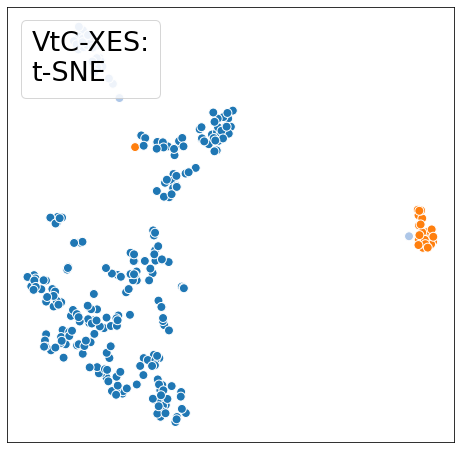

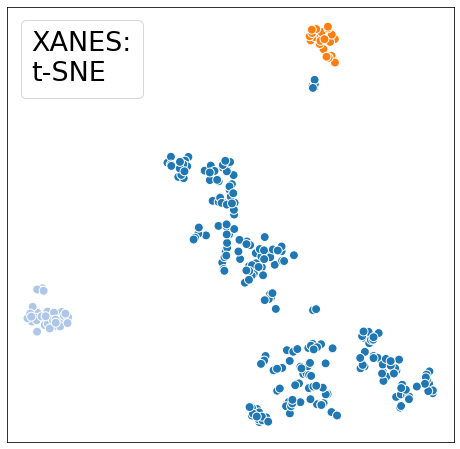

In [36]:
# # phosphorane subclasses
# codemap = phosphoranecodemap
# bin_names = list(PHOSPHORANECODES.keys())
# select = ['phosphorane', 'nitrogen_phosphorane','phosphine_oxide','sulfur_phosphorane']

# sulfur subclasses
codemap = sulfurcodemap
select = ['phosphate', 'phosphorothioate', 'dithiophosphate']
bin_names = list(SULFURCODES.keys())

kwargs = {'Class': select}
options = {'loc':2}

X_subset, XES_tsnemap, XES_TSNE, hiddenCIDS = get_subset_maps(X_data_classed, codemap, mode='XES', perplexity=20,
                                                              **kwargs)
X_subset, XANES_tsnemap, XANES_TSNE, hiddenCIDS = get_subset_maps(X_data_classed, codemap, mode='XANES', perplexity=15,
                                                                  **kwargs)


for mode in ['XES', 'XANES']:
    if mode == 'XANES':
        tsnemap = XANES_tsnemap
    else:
        tsnemap = XES_tsnemap
    #################### tsne plot
    tsne_plt = plot_dim_red(plt.subplots(figsize=(8,8)), X_subset, tsnemap, size=80,
                            colorcodemap=codemap, coloralpha=1., hiddenalpha=0.03,
                            mode=mode, method='t-SNE', fontsize=27, edgecolors='w',
                            **Merge(kwargs, options))  

In [ ]:
# labels= ['phosphenic_acid', 'phosphinate']
# pattern = "Increasing\nOH groups"
# plot = plt.subplots(figsize=(8,3))
# fig = make_legend(plot, labels, pattern)